# Boston

In [6]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# keras.datasets 안에 boston_housing 데이터셋을 로드
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인
print(len(train_data))
print(len(test_data))

# 데이터셋의 전처리를 위해 표준화 작업을 수행
# 먼저 입력 데이터의 각 특성의 평균을 뺌
mean = train_data.mean(axis=0)
train_data = train_data - mean


# 평균을 뺀 입력 데이터에서 표준편차를 나눔
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 함
std = train_data.std(axis=0)
train_data = train_data / std


# 테스트 데이터셋도 평균을 빼고, 표준편차로 나눔
test_data = test_data - mean
test_data = test_data / std


404
102


In [7]:
# 모델 구성 및 컴파일
# input_shape은 (train_data.shape[1], )으로 구성
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용


from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

Epoch 1/50


21/21 [==============================] - 0s 4ms/step - loss: 499.9760 - mae: 20.4111 - val_loss: 497.1313 - val_mae: 20.4145
Epoch 2/50
21/21 [==============================] - 0s 1ms/step - loss: 369.5674 - mae: 17.1199 - val_loss: 342.1719 - val_mae: 16.4446
Epoch 3/50
21/21 [==============================] - 0s 1ms/step - loss: 231.0007 - mae: 12.9477 - val_loss: 202.7457 - val_mae: 11.7840
Epoch 4/50
21/21 [==============================] - 0s 1ms/step - loss: 119.5203 - mae: 8.6173 - val_loss: 102.9888 - val_mae: 7.5252
Epoch 5/50
21/21 [==============================] - 0s 1ms/step - loss: 63.6284 - mae: 5.8143 - val_loss: 69.6580 - val_mae: 5.9721
Epoch 6/50
21/21 [==============================] - 0s 1ms/step - loss: 46.0973 - mae: 4.8059 - val_loss: 49.1080 - val_mae: 5.0658
Epoch 7/50
21/21 [==============================] - 0s 1ms/step - loss: 36.4800 - mae: 4.2057 - val_loss: 39.8224 - val_mae: 4.6659
Epoch 8/50
21/21 [==============================] - 0s 1ms/step - loss: 3

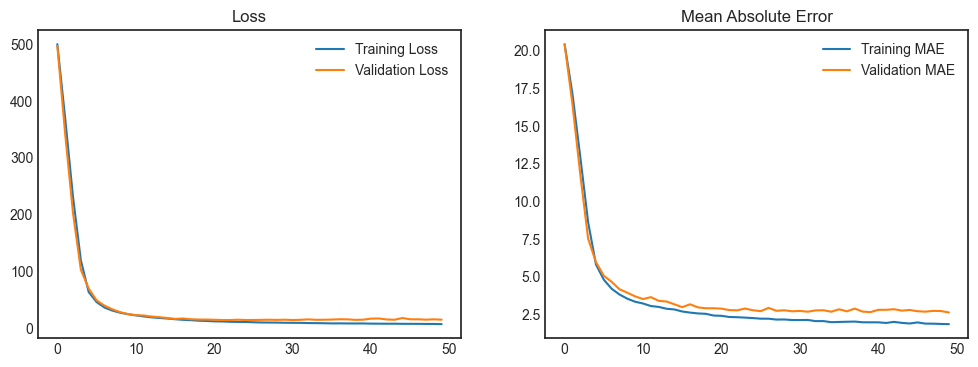

In [8]:
# 예측을 위한 딥러닝 모델을 학습
history = model.fit(train_data,train_labels, epochs=50, batch_size=16, validation_split=0.2)

# Loss 시각화

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Loss')

# MAE 시각화

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title('Mean Absolute Error')

plt.show()

/var/folders/91/xc9v37c52m793hfy2p1zlg5c0000gn/T/ipykernel_952/3985143735.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


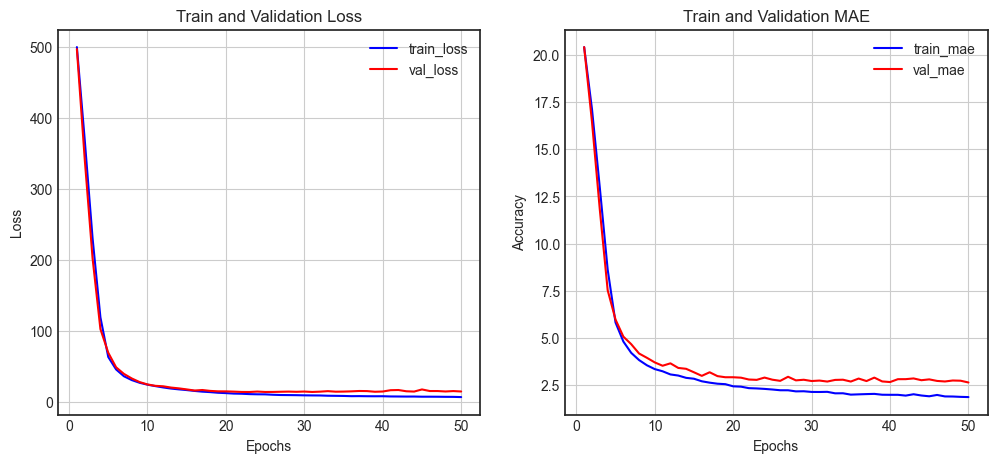

In [9]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보임
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [10]:
# 테스트 데이터셋을 이용해 모델을 평가
test_loss, test_mae = model.evaluate(test_data, test_labels)
print("Test Loss:", test_loss)
print("Test MAE:", test_mae)

4/4 [==============================] - 0s 910us/step - loss: 25.2941 - mae: 3.1485
Test Loss: 25.29412269592285
Test MAE: 3.1485044956207275


# Reuters

In [11]:
# reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters


(train_data,train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 [==============================] - 0s 0us/step
6736
2246
2246
46


In [12]:
# 텍스트 데이터의 전처리를 위해 각 데이터셋마다 원-핫 인코딩을 수행
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.  # 해당 단어의 인덱스 위치에 1을 설정
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [13]:
# 빠른 학습과 과대적합을 방지를 위한 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성
from tensorflow.keras import layers

model = models.Sequential()

# 입력층
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 은닉층
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 출력층
model.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               5120512   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [14]:
# ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행
from tensorflow.keras import callbacks

# ModelCheckpoint 콜백 설정
checkpoint_cb = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)

# EarlyStopping 콜백 설정
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
211/211 [==============================] - 3s 13ms/step - loss: 2.1572 - accuracy: 0.5588 - val_loss: 1.4159 - val_accuracy: 0.6892
Epoch 2/50
 11/211 [>.............................] - ETA: 2s - loss: 1.5273 - accuracy: 0.6790

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


211/211 [==============================] - 3s 12ms/step - loss: 1.3326 - accuracy: 0.7129 - val_loss: 1.1243 - val_accuracy: 0.7560
Epoch 3/50
211/211 [==============================] - 3s 12ms/step - loss: 1.0512 - accuracy: 0.7653 - val_loss: 1.0673 - val_accuracy: 0.7769
Epoch 4/50
211/211 [==============================] - 3s 13ms/step - loss: 0.8823 - accuracy: 0.7972 - val_loss: 1.0427 - val_accuracy: 0.7943
Epoch 5/50
211/211 [==============================] - 3s 12ms/step - loss: 0.7361 - accuracy: 0.8270 - val_loss: 0.9997 - val_accuracy: 0.8050
Epoch 6/50
211/211 [==============================] - 3s 13ms/step - loss: 0.6485 - accuracy: 0.8475 - val_loss: 0.9879 - val_accuracy: 0.7974
Epoch 7/50
211/211 [==============================] - 3s 12ms/step - loss: 0.5813 - accuracy: 0.8636 - val_loss: 0.9778 - val_accuracy: 0.8068
Epoch 8/50
211/211 [==============================] - 3s 12ms/step - loss: 0.5253 - accuracy: 0.8766 - val_loss: 0.9842 - val_accuracy: 0.8143
Epoch 9/50

/var/folders/91/xc9v37c52m793hfy2p1zlg5c0000gn/T/ipykernel_952/2989351394.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


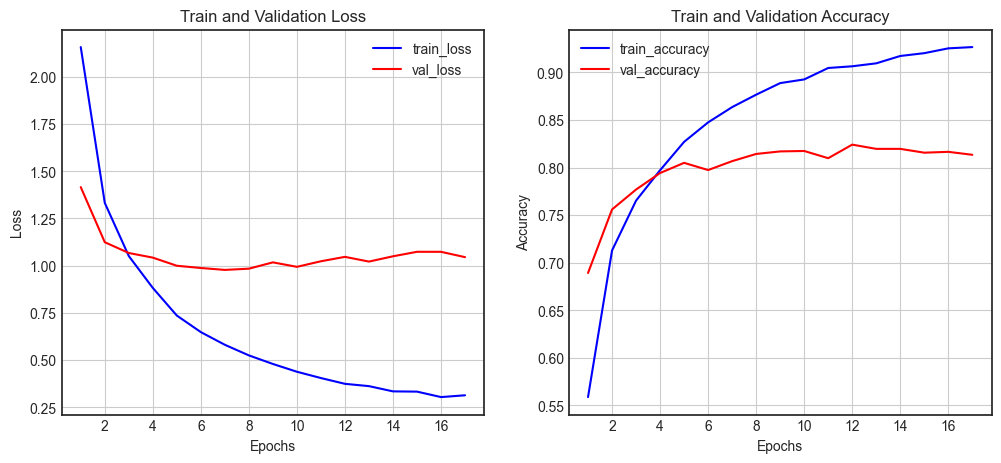

In [15]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [16]:
# 테스트 데이터셋을 이용해 모델을 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

71/71 [==============================] - 0s 3ms/step - loss: 1.0750 - accuracy: 0.7925
Test Loss: 1.0749810934066772
Test Accuracy: 0.7925200462341309


## Cifar10

In [17]:
# cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

(x_train_full, y_train_full),(x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 12s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [18]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

/var/folders/91/xc9v37c52m793hfy2p1zlg5c0000gn/T/ipykernel_952/4082054121.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


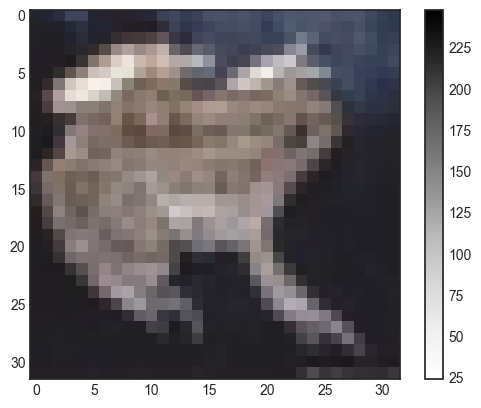

In [19]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화
plt.style.use('seaborn-white')

plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [20]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [21]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형

x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_val = x_val.reshape((x_val.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [22]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [23]:
# BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성

from tensorflow.keras import layers, models

model = models.Sequential()

# 입력층
model.add(layers.Dense(512, activation='relu', input_shape=(3072,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 은닉층
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 출력층
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               1573376   
                                                                 
 batch_normalization_3 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_4 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 256)              

In [24]:
utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
# ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행
from tensorflow.keras import callbacks

# ModelCheckpoint 콜백 설정
checkpoint_cb = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)

# EarlyStopping 콜백 설정
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1250/1250 [==============================] - 6s 4ms/step - loss: 2.2118 - accuracy: 0.2476 - val_loss: 1.8196 - val_accuracy: 0.3443
Epoch 2/50
  40/1250 [..............................] - ETA: 4s - loss: 1.9262 - accuracy: 0.3258

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 6s 5ms/step - loss: 1.8864 - accuracy: 0.3165 - val_loss: 1.7609 - val_accuracy: 0.3595
Epoch 3/50
1250/1250 [==============================] - 6s 4ms/step - loss: 1.8575 - accuracy: 0.3319 - val_loss: 1.8831 - val_accuracy: 0.3041
Epoch 4/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8672 - accuracy: 0.3259 - val_loss: 1.7718 - val_accuracy: 0.3563
Epoch 5/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8646 - accuracy: 0.3276 - val_loss: 1.7853 - val_accuracy: 0.3519
Epoch 6/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8675 - accuracy: 0.3257 - val_loss: 1.7641 - val_accuracy: 0.3704
Epoch 7/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8499 - accuracy: 0.3309 - val_loss: 1.7403 - val_accuracy: 0.3829
Epoch 8/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8328 - accuracy: 0.3383 - val_loss: 1.7184 - val_accuracy: 0.3796
Epo

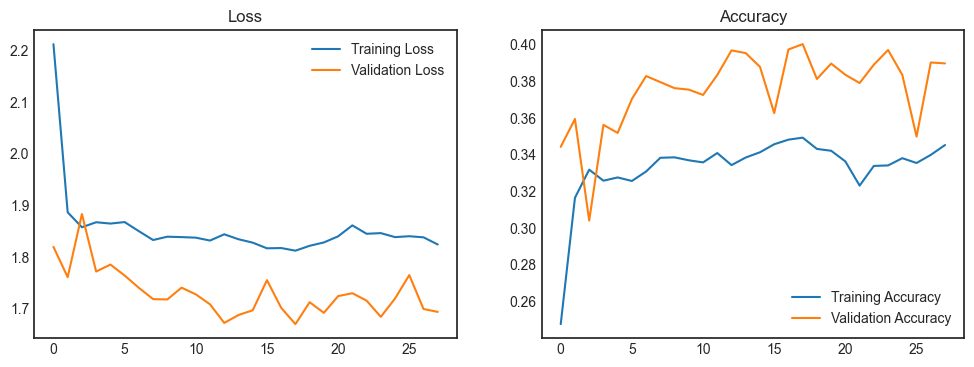

In [26]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화

# Loss 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [27]:
# 테스트 데이터셋을 이용해 모델을 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6606 - accuracy: 0.4015


[1.6605830192565918, 0.40149998664855957]